# State space reconstruction on the Lorenz system

In [1]:
%matplotlib inline
import numpy as np
import math as math
import matplotlib.pyplot as plt
from scipy import integrate
from sklearn.decomposition import PCA
from __future__ import division


In [3]:
rho = 28
sigma = 10
beta =8/3

#Initial condition
state0 = np.array([-8, -8, 27])

def difeq(data,t):
    '''System of differential eqautions'''
    x,y,z=data
    xp=sigma*(y-x)
    yp=x*(rho-z)-y
    zp=x*y-beta*z
    return [xp,yp,zp]

In [4]:
dt=0.01
T=300
discard_t = 100
T_total = T+discard_t
t=np.arange(0,T_total,dt)
data=integrate.odeint(difeq,state0,t)[int(discard_t/dt):]
N=len(data)
X=data[:,0]
Y=data[:,1]
Z=data[:,2]

## Lags from same time series
The Lag matrix is an easy tool to create embedings of the state space.

In [5]:
def getLag(tseries,m,tau=1):
    '''Input: Lag step tau ( = distance between lags),
    m = dimension of lag vector, tseries = time series data'''
    lengthY=tseries.shape[0]
    Ncolumns=m
    Nrows=math.ceil(lengthY/tau)-Ncolumns+1
    x=np.zeros([Nrows,Ncolumns])
    for k in range(Nrows):
        #Constructing the lag vector 
        xk=tseries[tau*k::tau]
        
        #Broadcasting them into same shape
        xk=np.array(xk[0:Ncolumns])
        x[k,:]=xk
    return x

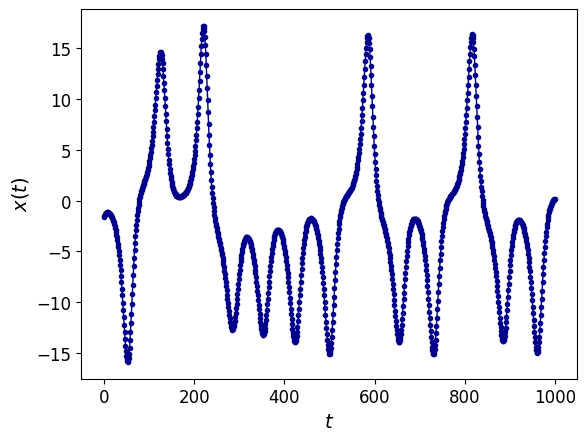

/var/folders/nd/69lm7fkj7fb7_431m00p32gr0000gn/T/ipykernel_1957/2833589635.py:23: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax2.w_xaxis.set_pane_color((0, 0, 0.2, .1))
/var/folders/nd/69lm7fkj7fb7_431m00p32gr0000gn/T/ipykernel_1957/2833589635.py:24: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax2.w_yaxis.set_pane_color((0, 0, 0.2, .1))
/var/folders/nd/69lm7fkj7fb7_431m00p32gr0000gn/T/ipykernel_1957/2833589635.py:25: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax2.w_zaxis.set_pane_color((0, 0, 0.2, .1))


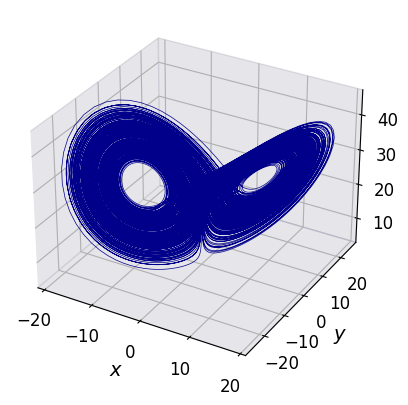

In [9]:
fig, ax2 = plt.subplots()
plt.plot(X[0:1000],'-',color="darkblue",markersize=1,linewidth=1)
plt.plot(X[0:1000],'o',color="darkblue",markersize=3,linewidth=1)
ax2.set_ylabel(r"$x(t)$",fontsize=14)
ax2.set_xlabel(r"$t$",fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='minor', labelsize=10)
fig.savefig('LorenzAttractorSample.png', format='png', dpi=600)
plt.show()

K=25
tau=5
x=getLag(Z,K,tau)
x=x.T

fig, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='minor', labelsize=10)
plt.plot(X,Y,Z,'-',color="darkblue",markersize=1,linewidth=0.5)
ax2.set_xlabel(r"$x$",fontsize=14)
ax2.set_ylabel(r"$y$",fontsize=14)
ax2.set_zlabel(r"$z$",fontsize=14)
ax2.w_xaxis.set_pane_color((0, 0, 0.2, .1))
ax2.w_yaxis.set_pane_color((0, 0, 0.2, .1))
ax2.w_zaxis.set_pane_color((0, 0, 0.2, .1))

fig.savefig('LorenzAttractor3d.png', format='png', dpi=600)
plt.show()

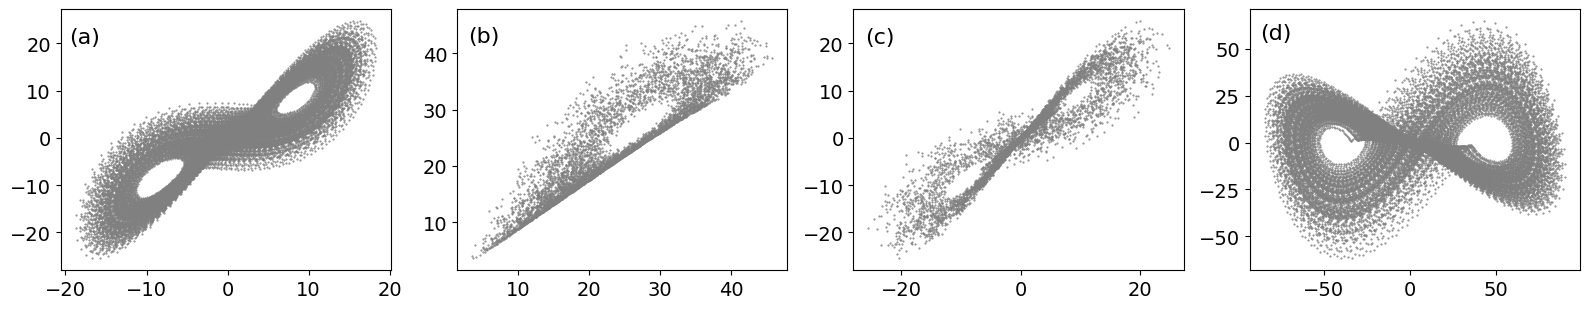

In [25]:
fig = plt.figure(figsize=plt.figaspect(0.2))
#Plot of time series
ax = fig.add_subplot(1, 4, 1)
ax.plot(X,Y,'.',color='grey',markersize=1,lw=0.5)
plt.text(-19.6,20, '(a)', size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.yaxis.get_offset_text().set_fontsize(14)

#Plot of delay embedding along z
ax = fig.add_subplot(1, 4, 2)
K=25
tau=5
x=getLag(Z,K,tau)
x=x.T
ax.plot(x[0],x[1],'.',color='grey',markersize=1,lw=0.5)
plt.text(3,42, '(b)', size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.yaxis.get_offset_text().set_fontsize(14)

ax = fig.add_subplot(1, 4, 3)
#Plot of delay embedding along y
x=getLag(Y,K,tau)
x=x.T
ax.plot(x[0],x[1],'.',color='grey',markersize=1,lw=0.5)
plt.text(-26, 20, '(c)', size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.yaxis.get_offset_text().set_fontsize(14)

#Plot of PCA
Lagmat=getLag(Y,25)
#Doing PCA on the lag matrix
pca=PCA()
pca.fit(Lagmat)
PCAMAT=pca.transform(Lagmat)
PCAMAT=PCAMAT.T
ax = fig.add_subplot(1, 4, 4)
ax.plot(PCAMAT[0],PCAMAT[1],'.',color='grey',markersize=1,lw=0.5)
plt.text(-87, 55, '(d)', size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.yaxis.get_offset_text().set_fontsize(14)


fig.tight_layout()
fig.savefig('Lorenz_SSR_illustration.png', dpi=600,bbox_inches='tight')

## Implementing the PCA explicitely

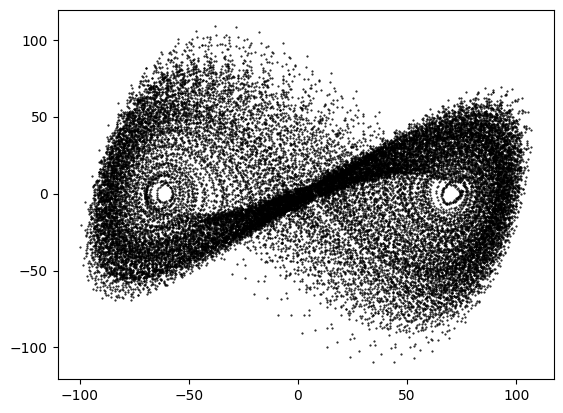

In [104]:
X = getLag(Ynoise,K)

#Subtracting the mean of each column
X_m = X-X.mean(axis=0)

#Covariance matrix of dimension k*k, already normalized
cov = np.cov(X_m.T)

#Diagonalizing the covariance matrix
eigvals,eigvecs = np.linalg.eig(cov)

Xhat= X.dot(eigvecs[:,:3])
fig = plt.figure()
plt.plot(Xhat[:,0],Xhat[:,1],'k.',markersize=1)
plt.show()